# 1. Importação das bibliotecas necessárias

In [1]:
# Importando o pandas
import pandas as pd

# Importando biblioteca para trabalhar com o MongoDB
import pymongo as pym

# Importando o numpy para trabalhar com cálculos matemáticos
import numpy as np

#Importando o seaborn e o matplotlib para análises gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Carga do arquivo e dados iniciais

In [2]:
# Lendo o arquivo CSV disponível nos microdados do Censo da Educação Superior e gravando
# ele em um DataFrame
docentes = pd.read_csv('../data/SUP_DOCENTE_2019.CSV', sep="|", encoding="latin-1")

In [3]:
# Verificando a quantidade de linhas e colunas do arquivo 
docentes.shape

(399428, 41)

In [4]:
docentes.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_DOCENTE_IES,ID_DOCENTE,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,...,IN_ATUACAO_GRAD_PRESENCIAL,IN_ATUACAO_POS_EAD,IN_ATUACAO_POS_PRESENCIAL,IN_ATUACAO_SEQUENCIAL,IN_ATUACAO_PESQUISA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,IN_EXERCICIO_DATA_REFERENCIA,IN_VISITANTE,TP_VISITANTE_IFES_VINCULO
0,2019,1,1,1,1178692,EC5AA8E675AD29C50386820A3F3E9F97,1,5,1.0,2,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN
1,2019,1,1,1,1178691,DDA849C5C6275470F9175628F502218E,1,4,1.0,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
2,2019,1,1,1,1178693,2FF35722D03A9C6459FB5470F17F6709,1,3,1.0,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
3,2019,1,1,1,1180431,C5AB8500E4EC686BFFF71870108EA10A,1,5,1.0,2,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
4,2019,1,1,1,1178686,60FD7BF0222B1B16D19D9E4E08D4178A,1,5,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN


In [5]:
# Selecionando somente as colunas necessárias descritas na documentação do trabalho: 
docentes = docentes[{'CO_IES','ID_DOCENTE','TP_ESCOLARIDADE','TP_SEXO','NU_IDADE',
                'TP_COR_RACA','IN_DEFICIENCIA', 'TP_SITUACAO'}]

In [6]:
# Verificando novamente a quantidade de linhas e colunas do arquivo
# após a seleção de somente as colunas necessárias
docentes.shape

(399428, 8)

In [7]:
# Verificando o tipo de cada coluna
docentes.dtypes

TP_COR_RACA         int64
TP_SEXO             int64
TP_ESCOLARIDADE     int64
IN_DEFICIENCIA      int64
CO_IES              int64
ID_DOCENTE         object
NU_IDADE            int64
TP_SITUACAO         int64
dtype: object

# 3. Tratando os dados do dataset

In [8]:
## Verificando a quantidade de valores nulos por coluna
docentes.isnull().sum()

TP_COR_RACA        0
TP_SEXO            0
TP_ESCOLARIDADE    0
IN_DEFICIENCIA     0
CO_IES             0
ID_DOCENTE         0
NU_IDADE           0
TP_SITUACAO        0
dtype: int64

In [ ]:
# No arquivo do Censo, cada atributo está armazenado como número 
# então preciso fazer o tratamento desses dados conforme dicionário 
# também disponível no Censo 

In [9]:
# 1) Alterando o tipo dos dados int, para object (string)
docentes['TP_SEXO'] = docentes['TP_SEXO'].apply(str)
docentes['TP_COR_RACA'] = docentes['TP_COR_RACA'].apply(str)
docentes['IN_DEFICIENCIA'] = docentes['IN_DEFICIENCIA'].apply(str)
docentes['TP_ESCOLARIDADE'] = docentes['TP_ESCOLARIDADE'].apply(str)
docentes['TP_SITUACAO'] = docentes['TP_SITUACAO'].apply(str)

In [10]:
# Alterando os valores por suas respectivas categorias  
# 2) TP_SEXO: 1: Feminino; 2: Masculino.  
docentes.loc[docentes['TP_SEXO'] == '1', 'TP_SEXO'] = 'Feminino'
docentes.loc[docentes['TP_SEXO'] == '2', 'TP_SEXO'] = 'Masculino'

# 3) TP_COR_RACA: 0: Não quis declaradar; 1: Branca; 2: Preta; 3: Parda; 4: Amarela; 5: Indígena; 9: Sem informação. 
docentes.loc[docentes['TP_COR_RACA'] == '0', 'TP_COR_RACA'] = 'Não quis declarar'
docentes.loc[docentes['TP_COR_RACA'] == '1', 'TP_COR_RACA'] = 'Branca'
docentes.loc[docentes['TP_COR_RACA'] == '2', 'TP_COR_RACA'] = 'Preta'
docentes.loc[docentes['TP_COR_RACA'] == '3', 'TP_COR_RACA'] = 'Parda'
docentes.loc[docentes['TP_COR_RACA'] == '4', 'TP_COR_RACA'] = 'Amarela'
docentes.loc[docentes['TP_COR_RACA'] == '5', 'TP_COR_RACA'] = 'Indígena'
docentes.loc[docentes['TP_COR_RACA'] == '9', 'TP_COR_RACA'] = 'Sem informaçã'

# 4) IN_DEFICIENCIA: 0: Não; 1:Sim; 9: Sem informação. 
docentes.loc[docentes['IN_DEFICIENCIA'] == '0', 'IN_DEFICIENCIA'] = 'Não'
docentes.loc[docentes['IN_DEFICIENCIA'] == '1', 'IN_DEFICIENCIA'] = 'Sim'
docentes.loc[docentes['IN_DEFICIENCIA'] == '9', 'IN_DEFICIENCIA'] = 'Sem informação'

# 5) TP_ESCOLARIDADE: 1: Sem graduação; 2: Graduação; 3: Especialização; 4: Mestrado; 5: Doutorado. 
docentes.loc[docentes['TP_ESCOLARIDADE'] == '1', 'TP_ESCOLARIDADE'] = 'Sem graduação'
docentes.loc[docentes['TP_ESCOLARIDADE'] == '2', 'TP_ESCOLARIDADE'] = 'Graduação'
docentes.loc[docentes['TP_ESCOLARIDADE'] == '3', 'TP_ESCOLARIDADE'] = 'Especialização'
docentes.loc[docentes['TP_ESCOLARIDADE'] == '4', 'TP_ESCOLARIDADE'] = 'Mestrado'
docentes.loc[docentes['TP_ESCOLARIDADE'] == '5', 'TP_ESCOLARIDADE'] = 'Doutorado'

# 5) TP_SITUACAO: 1: Em exercício; 2: Afastado para qualificação; 3: Afastado para exercício em outros órgãos/entidades;
# 4: Afastado por outros motivos; 5:  Afastado para tratamento de saúde. 6. Falecido 
docentes.loc[docentes['TP_SITUACAO'] == '1', 'TP_SITUACAO'] = 'Em exercício'
docentes.loc[docentes['TP_SITUACAO'] == '2', 'TP_SITUACAO'] = 'Afastado para qualificação'
docentes.loc[docentes['TP_SITUACAO'] == '3', 'TP_SITUACAO'] = 'EAfastado para exercício em outros órgãos/entidades'
docentes.loc[docentes['TP_SITUACAO'] == '4', 'TP_SITUACAO'] = 'Afastado por outros motivos'
docentes.loc[docentes['TP_SITUACAO'] == '5', 'TP_SITUACAO'] = 'Afastado para tratamento de saúde'
docentes.loc[docentes['TP_SITUACAO'] == '6', 'TP_SITUACAO'] = 'Falecido'

In [11]:
docentes.head()

,TP_COR_RACA,TP_SEXO,TP_ESCOLARIDADE,IN_DEFICIENCIA,CO_IES,ID_DOCENTE,NU_IDADE,TP_SITUACAO
0,Parda,Masculino,Doutorado,Não,1,EC5AA8E675AD29C50386820A3F3E9F97,67,Em exercício
1,Parda,Masculino,Mestrado,Não,1,DDA849C5C6275470F9175628F502218E,50,Em exercício
2,Amarela,Masculino,Especialização,Não,1,2FF35722D03A9C6459FB5470F17F6709,64,Em exercício
3,Branca,Masculino,Doutorado,Não,1,C5AB8500E4EC686BFFF71870108EA10A,54,Em exercício
4,Branca,Masculino,Doutorado,Não,1,60FD7BF0222B1B16D19D9E4E08D4178A,62,Em exercício


# 4. Análise dos dados de docentes

In [12]:
print("Quantidade de linhas: ", docentes.shape[0])
print("Quantidade de colunas: ",docentes.shape[1])

Quantidade de linhas:  399428
Quantidade de colunas:  8


In [13]:
# Descrição dos dados
docentes.describe()

,CO_IES,NU_IDADE
count,399428.000000,399428.000000
mean,2320.429785,44.858067
std,4247.329425,10.938593
min,1.000000,20.000000
25%,409.000000,36.000000
50%,621.000000,43.000000
75%,1988.000000,53.000000
max,24672.000000,101.000000


In [14]:
docentes.query("NU_IDADE == 101")

,TP_COR_RACA,TP_SEXO,TP_ESCOLARIDADE,IN_DEFICIENCIA,CO_IES,ID_DOCENTE,NU_IDADE,TP_SITUACAO
79706,Branca,Masculino,Doutorado,Não,322,6F9ED241CE7C947ABAB59D9BEB1B4D2B,101,Em exercício


Text(0.5, 1.0, 'Quantiade de docentes por sexo')

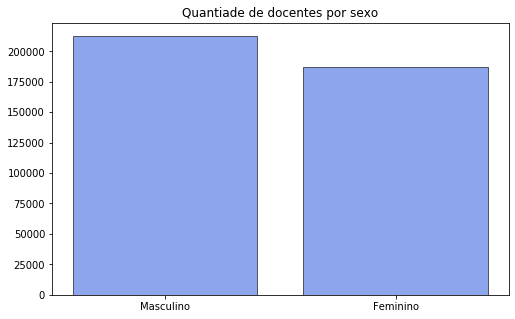

In [15]:
count = docentes["TP_SEXO"].value_counts().values
sexo = docentes["TP_SEXO"].value_counts().index
plt.figure(figsize = (18, 5))
plt.subplot(1, 2, 1)
plt.bar(sexo, count, ec = "k", alpha = .6, color = "royalblue")
plt.xlabel("")
plt.title("Quantiade de docentes por sexo")


Text(0.5, 1.0, 'Quantiade de docentes por escolaridade')

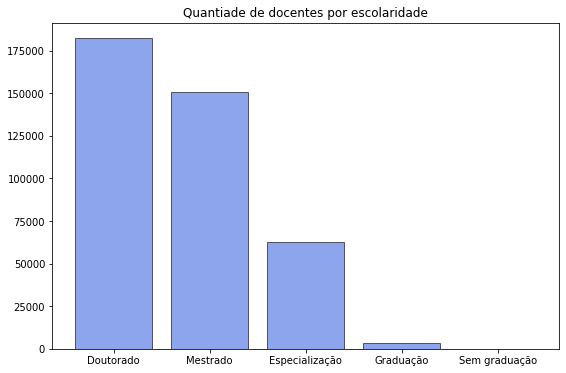

In [16]:
count = docentes["TP_ESCOLARIDADE"].value_counts().values
escolaridade = docentes["TP_ESCOLARIDADE"].value_counts().index
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.bar(escolaridade, count, ec = "k", alpha = .6, color = "royalblue")
plt.xlabel("")
plt.title("Quantiade de docentes por escolaridade")

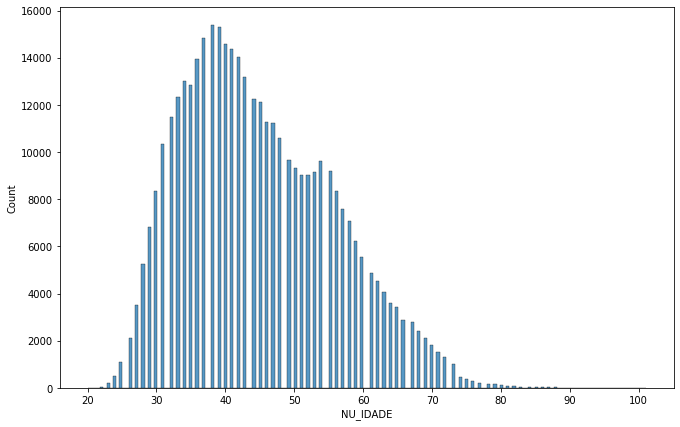

In [17]:
plt.figure(figsize = (11,7))
sns.histplot(docentes, x = "NU_IDADE")

Text(0.5, 1.0, 'Quantiade de docentes por situação na IES')

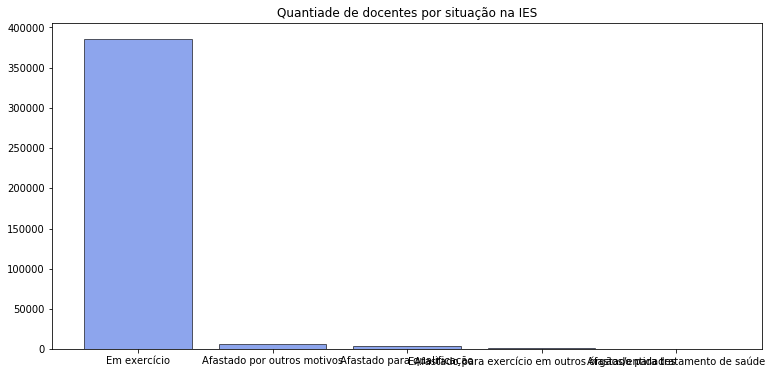

In [18]:
count = docentes["TP_SITUACAO"].value_counts().values
situacao = docentes["TP_SITUACAO"].value_counts().index
plt.figure(figsize = (28, 6))
plt.subplot(1, 2, 1)
plt.bar(situacao, count, ec = "k", alpha = .6, color = "royalblue")
plt.xlabel("")
plt.title("Quantiade de docentes por situação na IES")

In [19]:
print("Quantidade de professores: ")
len(docentes["ID_DOCENTE"].unique())

Quantidade de professores: 


351583

# 5. Envio dos dados para o mongoDB

In [20]:
# Criando a conexão com o mongoDB
client = pym.MongoClient('mongodb://localhost:27017/')

# Acessando a base de dados criada para o teste
db = client['censo']

# Acessando a coleção curso dentro da base de dados censo  
collection_docente =  db['docente']

In [21]:
# Transformando o DataSet dos cursos em um dicionario com o objetivo
# de salvar ele no MongoDB, pois o banco não aceita estruturas do tipo DataFrame
docente_dict = docentes.to_dict('records')

In [22]:
# Enviando os dados para o MongoDB
collection_docente.insert_many(docente_dict)